# DATA SCIENCE PROJECT ON DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS
## BUSINESS CASE: BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE LATE DELIVERY

### EXPLOTARY DATA ANALYSIS 
Exploratory Data Analysis (EDA) is a vital process involving initial inquiries into data to uncover patterns and validate assumptions, employing summary statistics and graphical representations.

#### Basic checks of data
1.Examine the data\
2.Statistical measures of data\
3.Total sales for all regions\
4.Top 10 countries by sales of orders\
5.Top 10 products and region with most losses\
6.What are the trends in average sales over year, month, week and hour\
7.Distribution of Sales\
8.Suspected fraud orders per customer segment\
9.Suspected fraud orders per market

# Importing Libraries

In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Insights:
We are importing essential Python libraries - Pandas for data manipulation, NumPy for numerical operations, and Matplotlib/Seaborn for data visualization and set up the notebook to display Matplotlib plots inline. Additionally, we suppress warnings using the 'warnings' library.

#  Importing RAW Data

In [2]:
E_df=pd.read_csv(r'C:\Users\user\Downloads\GEMS PROJECT\data\raw\DataCoSupplyChainDataset.csv', encoding='latin1')
pd.set_option('display.max_columns',None) # Used to display the all features

In [3]:
E_df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,S

### Head:
Here we are displaying the first 5 rows of the data from DataFrame using the head() method. This allows us to quickly inspect the structure and content of the data

In [4]:
E_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### Tail:
This command displays the last few rows of the data of the DataFrame using the tail() method. This is another way to visually inspect the data.

In [5]:
E_df.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.0,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,9141,Clark,XXXXXXXXX,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,9141,1/16/2016 1:34,26037,1004,4.0,0.01,65161,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,291,Smith,XXXXXXXXX,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,291,1/15/2016 21:00,26024,1004,8.0,0.02,65129,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,Australia del Sur,PENDING,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,2813,Smith,XXXXXXXXX,Consumer,PR,2585 Silent Autumn Landing,725.0,7,Fan Shop,18.213350,-66.370575,Pacific Asia,Adelaide,Australia,2813,1/15/2016 20:18,26022,1004,12.0,0.03,65126,399.980011,0.48,1,399.980011,387.980011,186.229996,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Andrea,7547,Ortega,XXXXXXXXX,Consumer,PR,697 Little Meadow,725.0,7,Fan Shop,18.290380,-66.370613,Pacific Asia,Nagercoil,India,7547,1/15/2016 18:54,26018,1004,16.0,0.04,65113,399.980011,0.44,1,399.980011,383.980011,168.949997,South Asia,Tamil Nadu,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class


### Shape:
This command displays the dimensions of DataFrame being the number of rows and columns.

In [6]:
E_df.shape

(180519, 53)

### Size:
This command displays the total number of elements in the DataFrame.

In [7]:
E_df.size

9567507

### Columns:
This command displays all the columns in the DataFrame.

In [8]:
E_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

### Info:
This command displays a summary of the DataFrame, including information about the data types, non-null values, and memory usage.

In [9]:
E_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

### Insights:
- This DataFrame has 180,519 entries and 53 columns.
- Missing values are present in columns such as customer_lname, customer_zipcode, order_zipcode, and product_description.
- Most columns are categorical, while some are numeric.
- Some columns like customer_email, customer_password, and product_description seem to have identical values across all entries.

### Describe(include='O'):
This command displays summary statistics of the categorical columns such as count, unique, top, frequency.\
count: Number of non-null entries in each column.\
unique: Number of unique values in each column.\
top: Most frequently occurring value in each column.\
freq: Frequency of the most frequently occurring value in each column

In [10]:
E_df.describe(include=['O']).T

,count,unique,top,freq
Type,180519,4,DEBIT,69295
Delivery Status,180519,4,Late delivery,98977
Category Name,180519,50,Cleats,24551
Customer City,180519,563,Caguas,66770
Customer Country,180519,2,EE. UU.,111146
Customer Email,180519,1,XXXXXXXXX,180519
Customer Fname,180519,782,Mary,65150
Customer Lname,180511,1109,Smith,64104
Customer Password,180519,1,XXXXXXXXX,180519
Customer Segment,180519,3,Consumer,93504


### Insights:
Customer Information:
- Most use "DEBIT" payment type.
- "Late delivery" is common.
- "Caguas" is the top customer city.
- Majority are from the United States.
- All emails and passwords seem identical.
- "Mary" and "Smith" are common first and last names.
- "Consumer" segment prevails.
- "PR" (Puerto Rico) is the top customer state.

Order Information:
- "Santo Domingo" is the leading order city.
- Most orders are from the United States.
- "COMPLETE" is the prevalent order status.
- "Central America" is the top order region.
- "Standard Class" is the primary shipping mode.

Product Information:
- Most products have unique images and names.
- "Perfect Fitness Perfect Rip Deck" is common.
- Shipping dates vary widely.

### Describe(exclude='O'):
This command displays descriptive statistics of the numerical columns such as count, mean, standard deviation, minimum, maximum, and quartiles.

In [11]:
E_df.describe(exclude='O').T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.000000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933


### Insights:
- Orders typically take around 3.5 days for real shipping and 2.9 days for scheduled shipment.\
- The average benefit per order is 22, with a wide range and some orders facing negative benefits. 
- Average sales per customer are around 183.\
- Approximately 55% of orders face a risk of late delivery.\
- Customers are spread across diverse locations, with varying latitudes and longitudes.\
- Order and Product Details: Orders typically consist of multiple items, with an average of 2.127 items per order. 
- Product prices vary widely, with an average of 141.\
- The average profit per order is 21.97, but some orders incur losses.\
- There are significant missing values for product zipcodes.\
- product_status has constant value and product_description is an empty column.

These insights highlight key aspects of shipping, financial metrics, delivery risk, geographical distribution, order and product details, profitability, and missing data in the dataset.

In [12]:
E_df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


### Insights:
- Missing values in customer_lname (8) and customer_zipcode (3).
- Significant missing values in order_zipcode (155679).
- Missing values in product_description for all records (180,519).

## Sales analysis by region

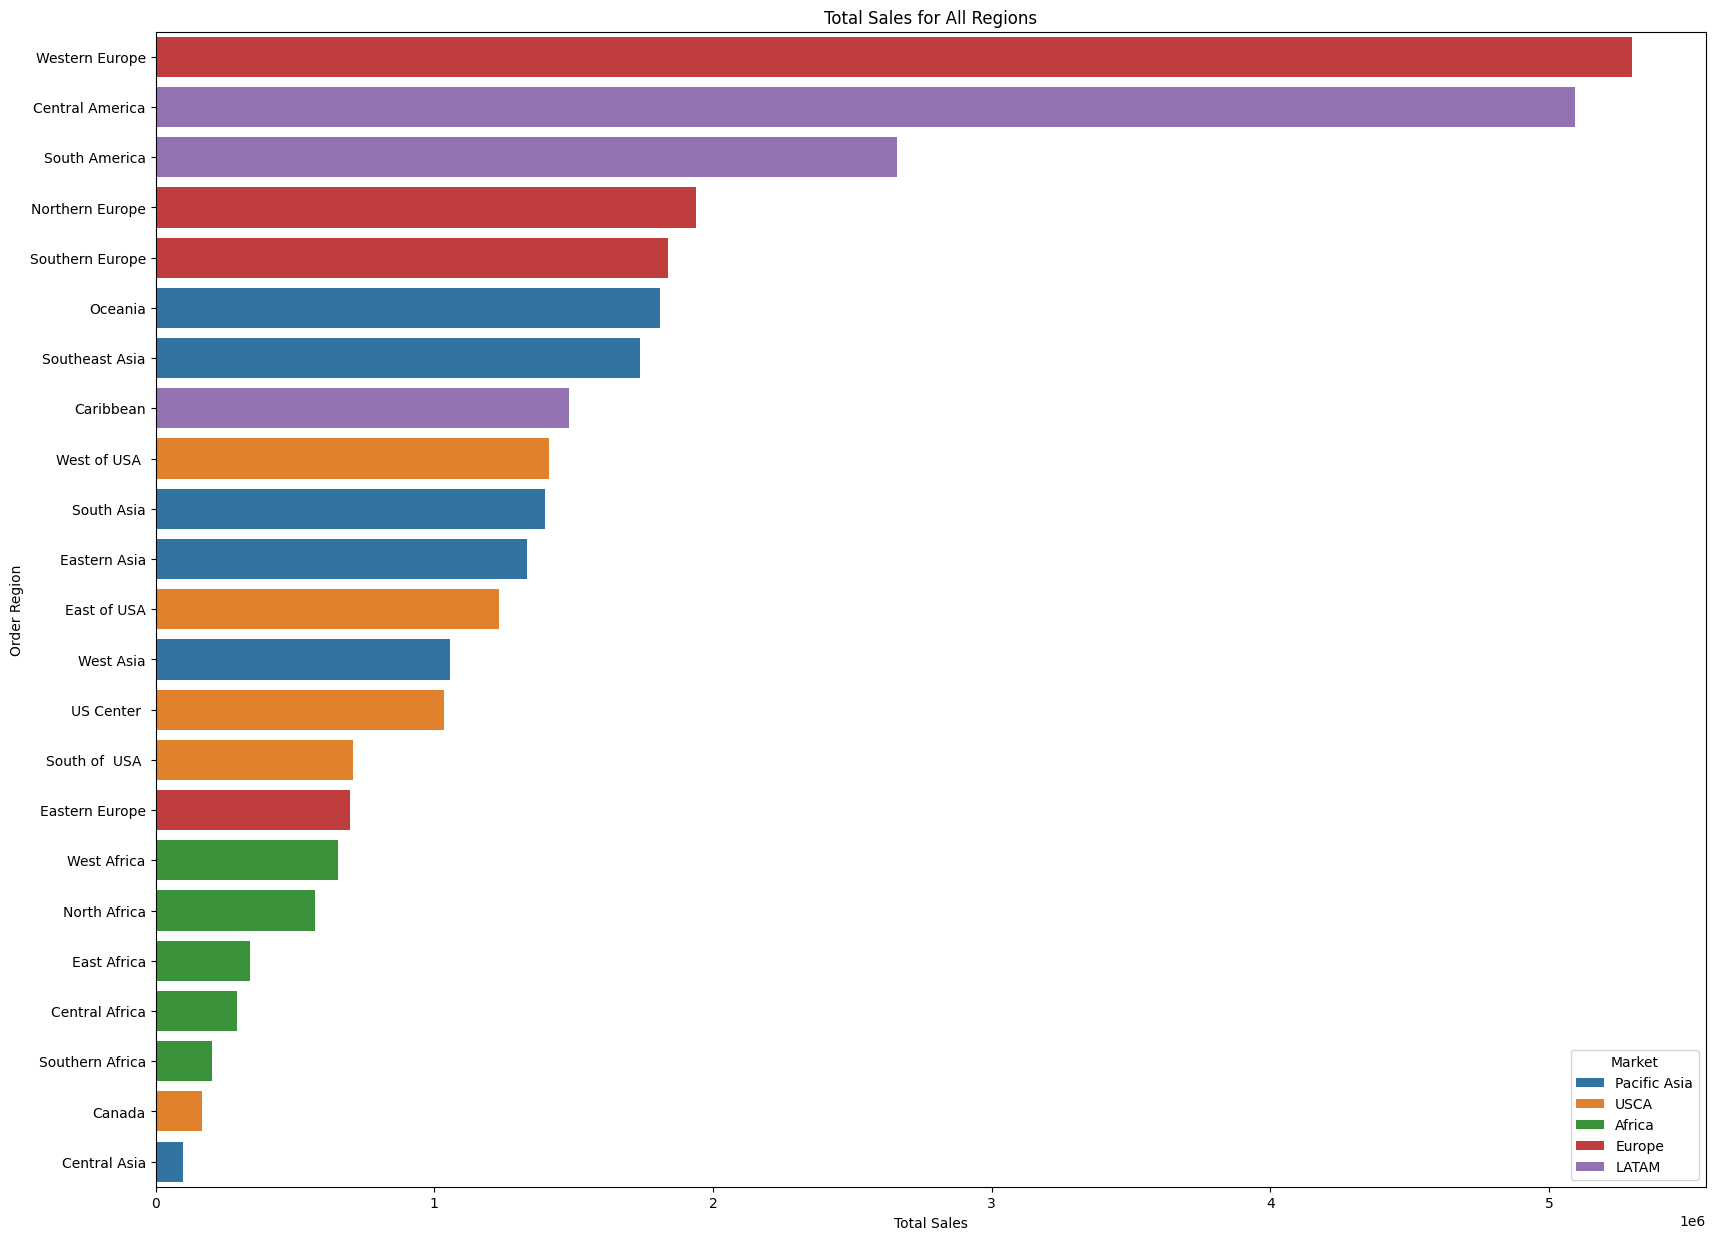

In [32]:
plt.figure(figsize=(20, 15)) # Total sales for all regions
sns.barplot(y='Order Region', x='Sales per customer',hue='Market', data=E_df, estimator=sum, ci=None, order=E_df.groupby('Order Region')['Sales per customer'].sum().sort_values(ascending=False).index, orient='h')
plt.title('Total Sales for All Regions')
plt.xlabel('Total Sales')
plt.ylabel('Order Region')
plt.show()

In [23]:
total_sales_per_region = E_df.groupby('Order Region')['Sales per customer'].sum().sort_values(ascending=False)
print("Total Sales for All Regions:")
print(total_sales_per_region)

Total Sales for All Regions:
Order Region
Western Europe     5.296003e+06
Central America    5.093850e+06
South America      2.660244e+06
Northern Europe    1.939362e+06
Southern Europe    1.837526e+06
Oceania            1.809997e+06
Southeast Asia     1.738553e+06
Caribbean          1.481669e+06
West of USA        1.412254e+06
South Asia         1.397365e+06
Eastern Asia       1.334313e+06
East of USA        1.231955e+06
West Asia          1.056081e+06
US Center          1.034129e+06
South of  USA      7.069043e+05
Eastern Europe     6.963072e+05
West Africa        6.541680e+05
North Africa       5.722420e+05
East Africa        3.380543e+05
Central Africa     2.929126e+05
Southern Africa    2.043025e+05
Canada             1.682574e+05
Central Asia       9.795369e+04
Name: Sales per customer, dtype: float64


### Insights:
The Western European market has the most number of sales whereas Central Asia has the least.

## Top 10 countries by sales of orders

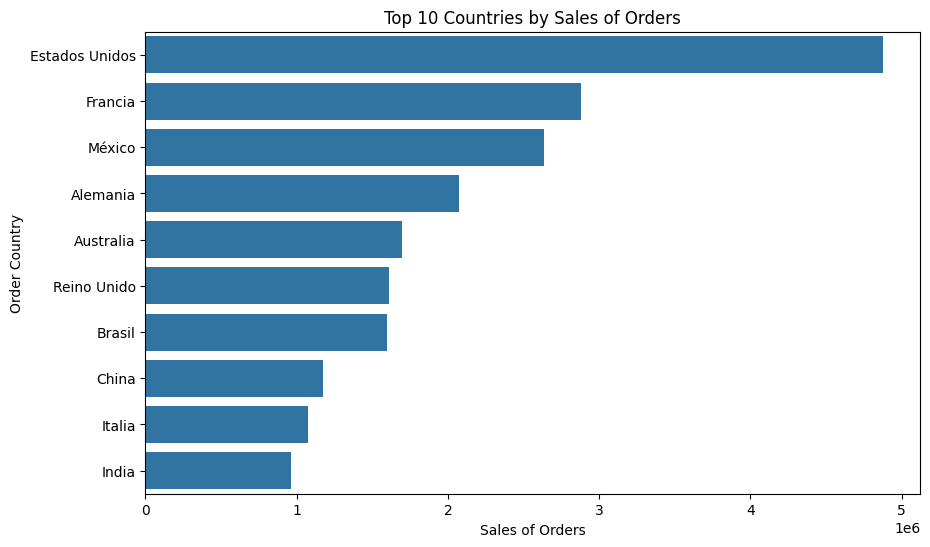

In [14]:
df_sales_country = E_df.groupby(['Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders', ascending=False)

top10_countries = df_sales_country.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_countries, x='Sales of Orders', y='Order Country')
plt.title('Top 10 Countries by Sales of Orders')
plt.xlabel('Sales of Orders')
plt.ylabel('Order Country')
plt.show()

In [24]:
df_sales_country = E_df.groupby(['Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders', ascending=False)
top10_countries = df_sales_country.head(10)
print("Top 10 Countries by Sales of Orders:")
print(top10_countries)

Top 10 Countries by Sales of Orders:
      Order Country  Sales of Orders
48   Estados Unidos     4.879668e+06
53          Francia     2.879942e+06
102          México     2.633195e+06
2          Alemania     2.074172e+06
8         Australia     1.694622e+06
120     Reino Unido     1.612095e+06
20           Brasil     1.594320e+06
31            China     1.172902e+06
75           Italia     1.072182e+06
69            India     9.623967e+05


### Insight:
Estados Unidos is the top-performing market, surpassing all other countries in terms of total sales volume.

## Top 10 products and region with most losses

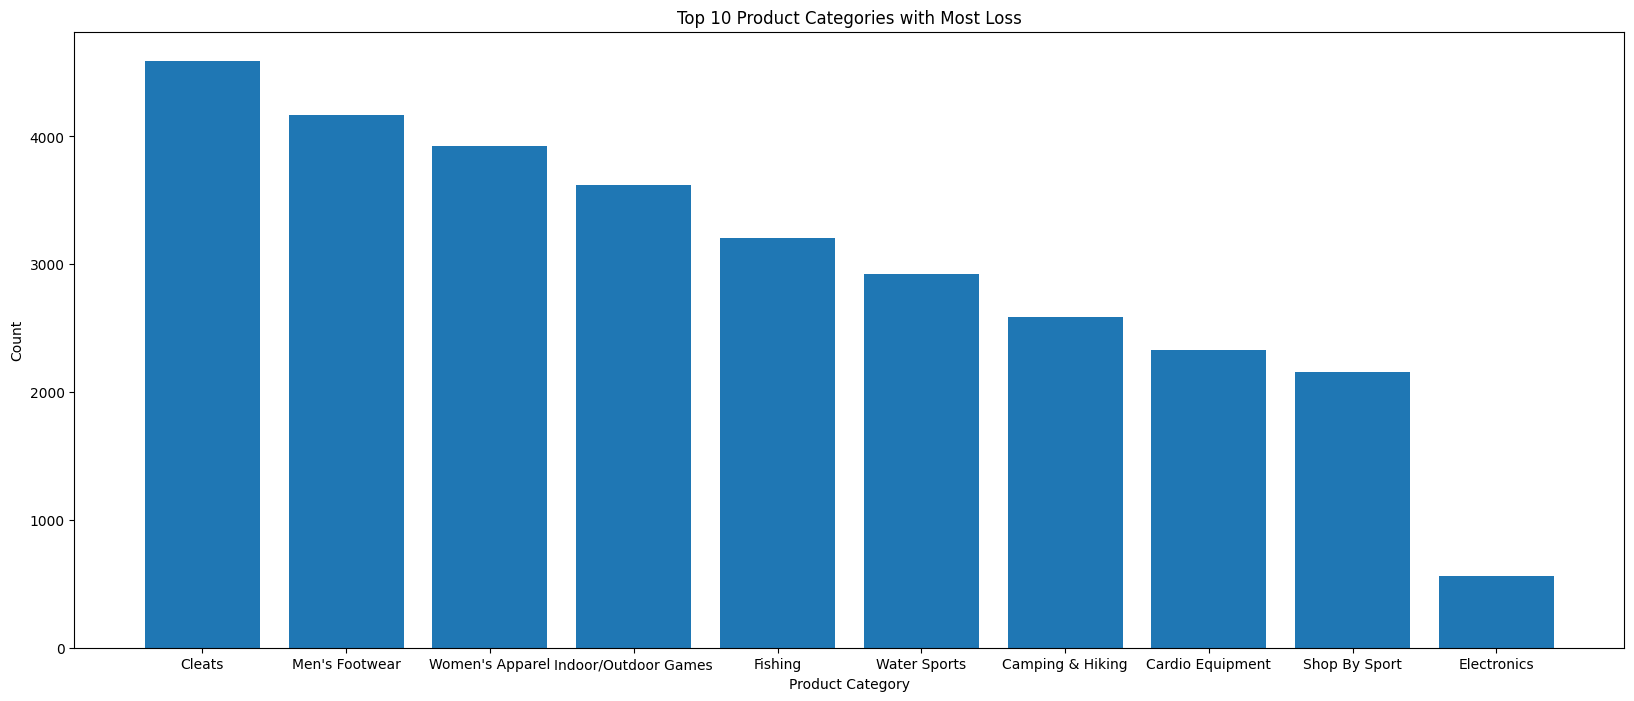

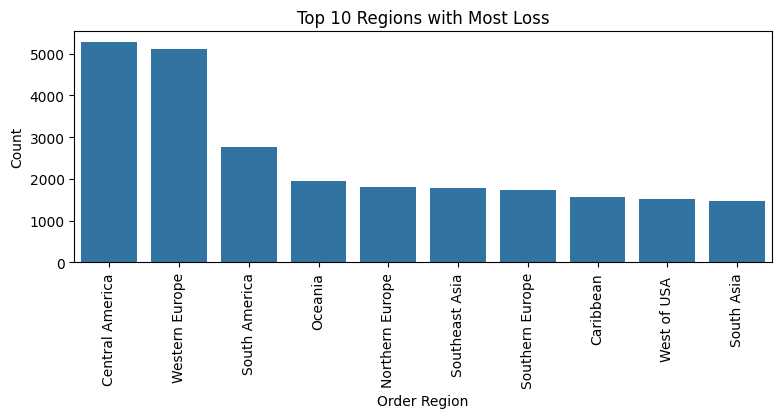

Total revenue lost with orders: -3883547.345768667


In [40]:
loss = E_df[E_df['Benefit per order'] < 0]

top_categories = loss['Category Name'].value_counts().nlargest(10)

plt.figure(figsize=(20, 8))
plt.bar(top_categories.index, top_categories.values)
plt.title('Top 10 Product Categories with Most Loss')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

top_regions_loss = loss['Order Region'].value_counts().nlargest(10)

plt.figure(figsize=(9, 3))
sns.barplot(x=top_regions_loss.index, y=top_regions_loss.values)
plt.title('Top 10 Regions with Most Loss')
plt.xlabel('Order Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

total_lost_revenue = loss['Benefit per order'].sum()
print('Total revenue lost with orders:', total_lost_revenue)

In [25]:
loss = E_df[E_df['Benefit per order'] < 0]

top_categories = loss['Category Name'].value_counts().nlargest(10) # 10 product categories with the most loss
print("Top 10 Product Categories with Most Loss:")
print(top_categories)

top_regions_loss = loss['Order Region'].value_counts().nlargest(10) # 10 regions with the most loss
print("\nRegions with Most Loss:")
print(top_regions_loss)

total_lost_revenue = loss['Benefit per order'].sum() # total lost sales
print('\nTotal revenue lost with orders:', total_lost_revenue) 

Top 10 Product Categories with Most Loss:
Category Name
Cleats                  4590
Men's Footwear          4169
Women's Apparel         3923
Indoor/Outdoor Games    3617
Fishing                 3209
Water Sports            2924
Camping & Hiking        2590
Cardio Equipment        2332
Shop By Sport           2154
Electronics              562
Name: count, dtype: int64

Regions with Most Loss:
Order Region
Central America    5268
Western Europe     5104
South America      2754
Oceania            1944
Northern Europe    1809
Southeast Asia     1790
Southern Europe    1734
Caribbean          1566
West of USA        1511
South Asia         1469
Name: count, dtype: int64

Total revenue lost with orders: -3883547.345768667


### Insights:
Cleats are the top product category associated with the most losses, while Central America emerges as the region with the highest count of losses.

# What are the trends in average sales over year, month, week and hour

In [16]:
import datetime as dt
data_orderdate = E_df[['order date (DateOrders)', 'Sales']]
data_orderdate['order_date'] = pd.to_datetime(data_orderdate['order date (DateOrders)'])

In [17]:
data_orderdate["Quarter"] = data_orderdate['order_date'].dt.quarter
data_orderdate["Month"] = data_orderdate['order_date'].dt.month
data_orderdate["Year"] = data_orderdate['order_date'].dt.year

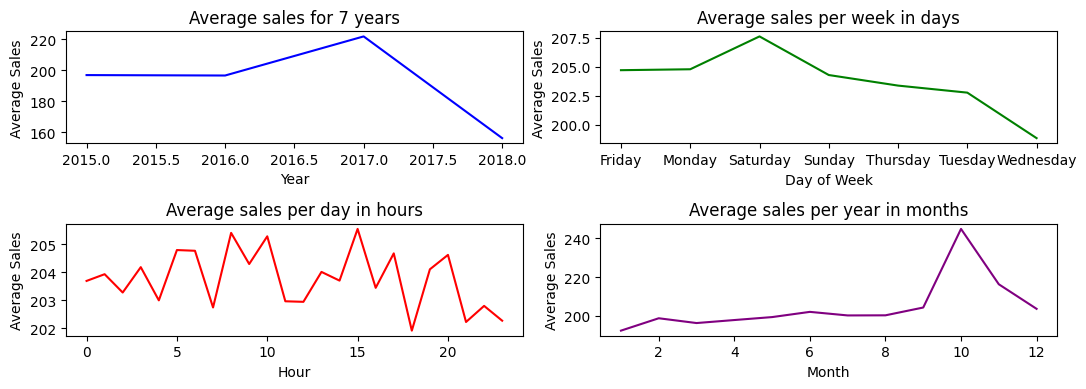

In [43]:
plt.figure(figsize=(11, 4))

plt.subplot(2, 2, 1) # average sales for each quarter
quarter = data_orderdate.groupby('Year')['Sales'].mean() 
quarter.plot(title='Average sales for 7 years', xlabel='Year', ylabel='Average Sales', color='blue')

plt.subplot(2, 2, 2) # average sales per week in days
days = data_orderdate.groupby(data_orderdate['order_date'].dt.day_name())['Sales'].mean()
days.plot(title='Average sales per week in days', xlabel='Day of Week', ylabel='Average Sales', color='green')

plt.subplot(2, 2, 3) # average sales per day in hours
hours = data_orderdate.groupby(data_orderdate['order_date'].dt.hour)['Sales'].mean()
hours.plot(title='Average sales per day in hours', xlabel='Hour', ylabel='Average Sales', color='red')

plt.subplot(2, 2, 4) # average sales per year in months
months = data_orderdate.groupby('Month')['Sales'].mean()
months.plot(title='Average sales per year in months', xlabel='Month', ylabel='Average Sales', color='purple')

plt.tight_layout()
plt.show()

In [26]:
print("Average sales for each quarter:")
print(quarter)

print("\nAverage sales per week in days:")
print(days)

print("\nAverage sales per day in hours:")
print(hours)

print("\nAverage sales per year in months:")
print(months)

Average sales for each quarter:
Year
2015    196.980550
2016    196.703714
2017    221.979776
2018    156.217671
Name: Sales, dtype: float64

Average sales per week in days:
order_date
Friday       204.694352
Monday       204.773813
Saturday     207.596241
Sunday       204.278891
Thursday     203.370523
Tuesday      202.765281
Wednesday    198.855525
Name: Sales, dtype: float64

Average sales per day in hours:
order_date
0     203.689082
1     203.928260
2     203.276221
3     204.179263
4     202.997264
5     204.787816
6     204.762143
7     202.744336
8     205.398410
9     204.290569
10    205.276500
11    202.964620
12    202.945095
13    204.009915
14    203.699936
15    205.539768
16    203.442939
17    204.669599
18    201.919805
19    204.102269
20    204.615398
21    202.227323
22    202.800481
23    202.273787
Name: Sales, dtype: float64

Average sales per year in months:
Month
1     192.404832
2     198.780897
3     196.313311
4     197.861774
5     199.384324
6     202.070

### Insights:
Highest number of orders are placed by customers in 2017.\
Saturday recorded highest number of average sales and wednesday with the least number of sales.\
Average sales per day in hours does not vary much.\
The most number of orders came in October.

## Distribution of Sales

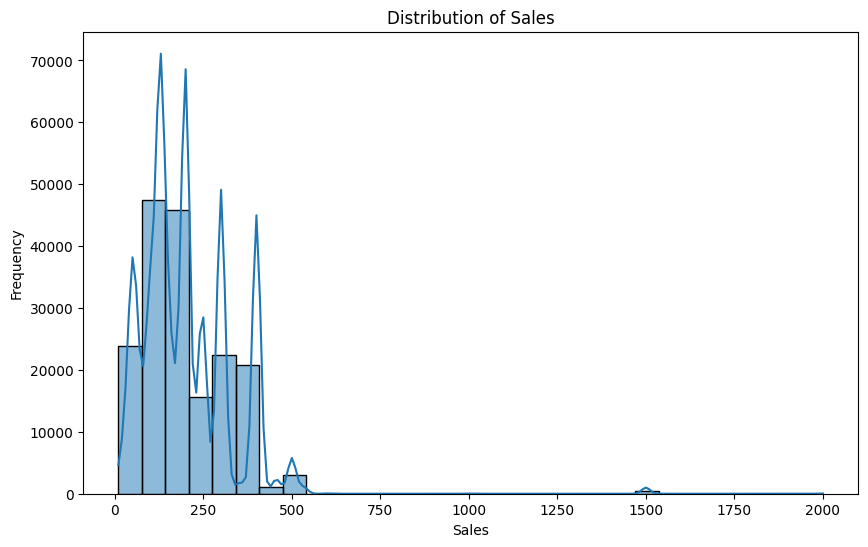

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=E_df, x='Sales', bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [27]:
sales_distribution_summary = E_df['Sales'].describe()
print("Sales Distribution Summary:")
print(sales_distribution_summary)

Sales Distribution Summary:
count    180519.000000
mean        203.772096
std         132.273077
min           9.990000
25%         119.980003
50%         199.919998
75%         299.950012
max        1999.989990
Name: Sales, dtype: float64


### Insights:
Product with sales price range of 75-200 are frequently bought.

## Suspected fraud orders per customer segment

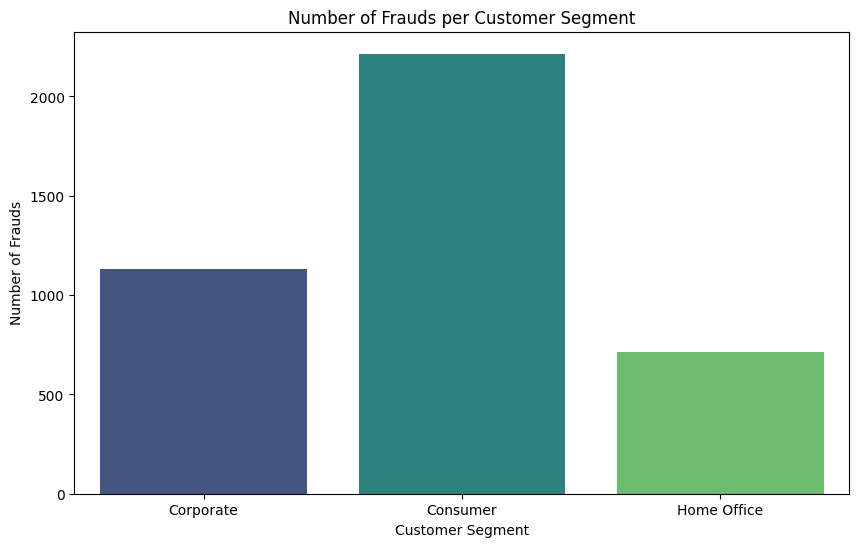

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=E_df[E_df['Order Status'] == 'SUSPECTED_FRAUD'], x='Customer Segment', palette='viridis')
plt.title('Number of Frauds per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Frauds')
plt.show()

In [28]:
frauds_per_segment = E_df[E_df['Order Status'] == 'SUSPECTED_FRAUD']['Customer Segment'].value_counts()
print("Number of Frauds per Customer Segment:")
print(frauds_per_segment)

Number of Frauds per Customer Segment:
Customer Segment
Consumer       2215
Corporate      1132
Home Office     715
Name: count, dtype: int64


### Insights:
Consumers represent the highest count of suspected frauds among different customer segments.

## Suspected fraud orders per market

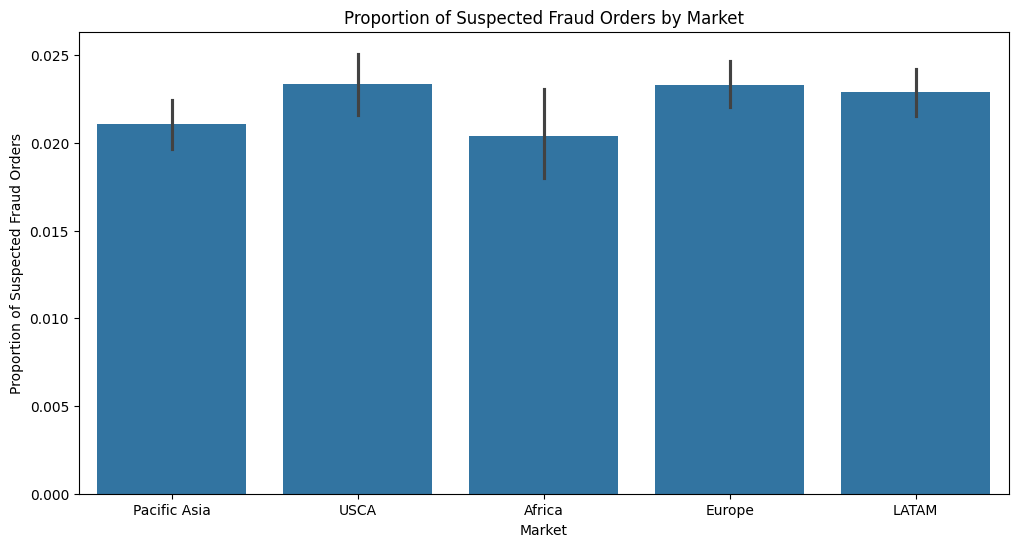

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=E_df['Market'], y=(E_df['Order Status'] == 'SUSPECTED_FRAUD'))
plt.xlabel('Market')
plt.ylabel('Proportion of Suspected Fraud Orders')
plt.title('Proportion of Suspected Fraud Orders by Market')
plt.show()

In [29]:
proportion_of_fraud_by_market = E_df.groupby('Market')['Order Status'].apply(lambda x: (x == 'SUSPECTED_FRAUD').mean())
print("Proportion of Suspected Fraud Orders by Market:")
print(proportion_of_fraud_by_market)

Proportion of Suspected Fraud Orders by Market:
Market
Africa          0.020406
Europe          0.023322
LATAM           0.022910
Pacific Asia    0.021062
USCA            0.023334
Name: Order Status, dtype: float64


### Insights:
Europe exhibits the highest count of suspected fraud orders among market.